In [43]:
from choice_model import ChoiceModel
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [44]:
old_model = ChoiceModel()
old_model.roll_back(0)
init_graph = old_model.graph
init_actors = [n for n,d in init_graph.nodes(data=True) if d['type']=='Actors']

In [45]:
old_model = ChoiceModel()
data = pd.DataFrame(columns=['series','period','CPR','ACI','MCP','NUM'])

In [46]:
series = 'true_data'
for period in range(0,10):
    old_model.roll_back(period)
    # old_model.remove_isolated_nodes()
    CPR, ACI, MCP = old_model.evaluate()
    num = len(list(old_model.graph.nodes))
    data .loc[len(data )] = [series,period,CPR, ACI, MCP,num]
    old_model.visualize(file_name=f"old_graph/period_{period}.html")

In [47]:
true_max_CPR = data['CPR'].max()
true_min_CPR = data['CPR'].min()
true_max_ACI = data['ACI'].max()
true_min_ACI = data['ACI'].min()
true_max_MCP = data['MCP'].max()
true_min_MCP = data['MCP'].min()

In [48]:
series = 'sim_data_2'
for period in range(0,10):
    file = f'{series}/{series}_{period}.pkl'
    new_model = ChoiceModel(graph_path=file) 
    # new_model.remove_isolated_nodes()
    num = len(list(new_model.graph.nodes))
    CPR,ACI,MCP = new_model.evaluate()
    data.loc[len(data)] = ['sim_baseline',period,CPR,ACI,MCP,num]

In [49]:
sim_data = data[data['series']=='sim_baseline']
sim_max_CPR = sim_data['CPR'].max()
sim_min_CPR = sim_data['CPR'].min()
sim_max_ACI = sim_data['ACI'].max()
sim_min_ACI = sim_data['ACI'].min()
sim_max_MCP = sim_data['MCP'].max()
sim_min_MCP = sim_data['MCP'].min()

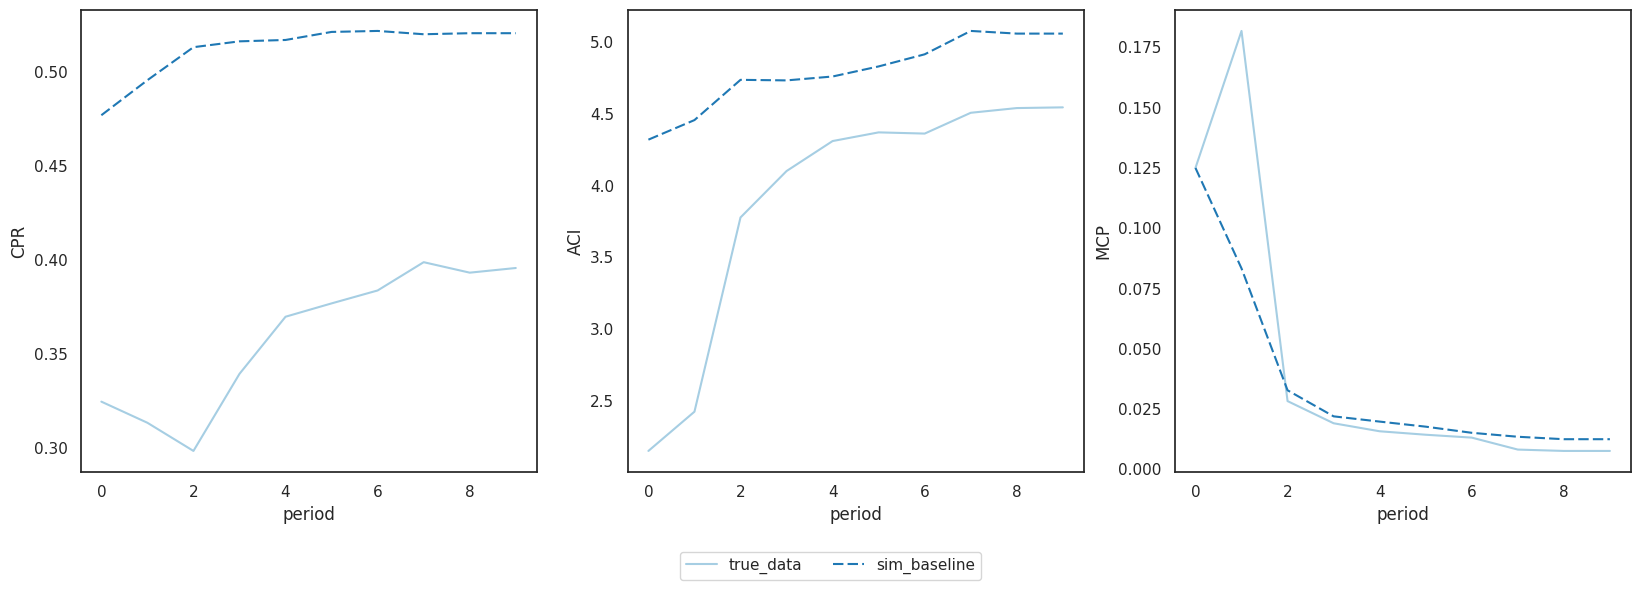

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="white")

fig, ax = plt.subplots(1, 3, figsize=(20, 6))

series = data['series'].unique().tolist()
line_styles = {k:[5,2] for k in series}
line_styles['true_data'] = []

# Plot the data with legends enabled temporarily
line1 = sns.lineplot(data=data, x='period', y='CPR', hue='series', style='series', dashes=line_styles, ax=ax[0], 
                     # palette=['r']+sns.color_palette("rocket_r")[:3]
                      palette = sns.color_palette("Paired")[:len(data['series'].unique())]
                    )
line2 = sns.lineplot(data=data, x='period', y='ACI', hue='series', style='series', dashes=line_styles, ax=ax[1], 
                     # palette=['r']+sns.color_palette("rocket_r")[:3]
                      palette = sns.color_palette("Paired")[:len(data['series'].unique())]
                    )
line3 = sns.lineplot(data=data, x='period', y='MCP', hue='series', style='series', dashes=line_styles, ax=ax[2], 
                     # palette=['r']+sns.color_palette("rocket_r")[:3]
                     palette = sns.color_palette("Paired")[:len(data['series'].unique())]
                    )

# Get handles and labels from the first plot
handles, labels = line1.get_legend_handles_labels()

# Turn off individual legends
ax[0].legend().remove()
ax[1].legend().remove()
ax[2].legend().remove()


# Add a single legend
fig.legend(handles, labels, loc='upper center', ncol=len(labels), bbox_to_anchor=(0.5, -0.01))
fig.savefig("data1.png")
plt.show()